### Data Source: Satellite Image from WIFIRE Project
WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread.

### RGB Color Mapping in the photo
1. Red pixel indicates altitude
2. Blue pixel indicates aspect
3. Green pixel indicates slope

The higher the values indicate higher altitude, aspect and slope

In [1]:
import imageio
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
# Creating a numpy array from an image file
# Lets choose the WIFIRE satellite image file as an ndarray and display its type

from skimage import data
photo_data=imageio.imread("../data/sd-3layers.jpg")
type(photo_data)

imageio.core.util.Array

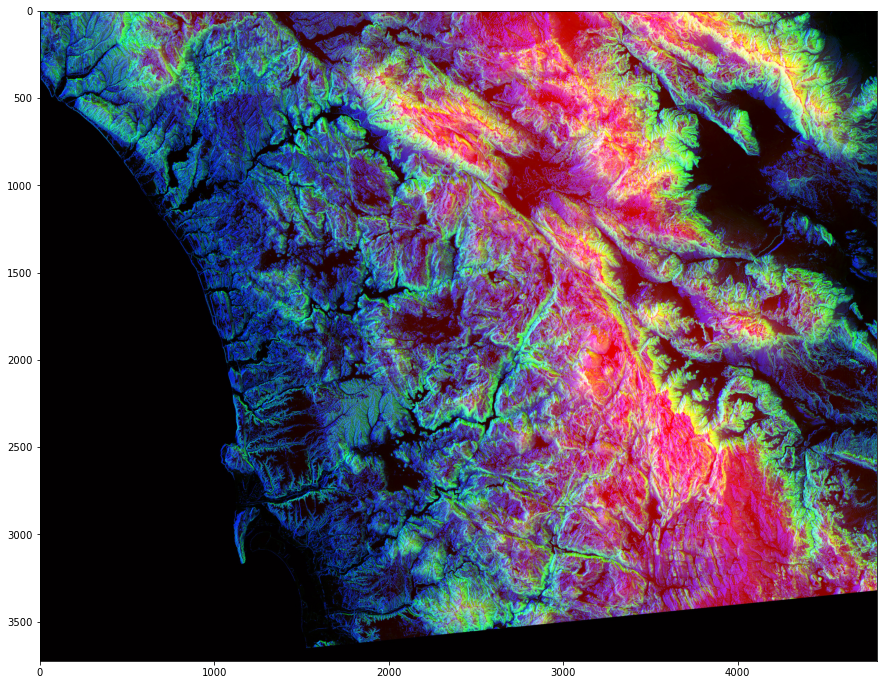

In [4]:
plt.figure(figsize=(15, 15))
plt.imshow(photo_data)
plt.show()


In [40]:
print("size of photo data", photo_data.size)
print("minimum size of photo data", photo_data.min())
print("maximum size of photo data", photo_data.max())
print("mean size of photo data", photo_data.mean())


size of photo data 53606475
minimum size of photo data 0
maximum size of photo data 255
mean size of photo data 75.8299354508947


In [41]:
# The below line will print the red, blue and green in the order
print("Pixel on the 150th row and 250th column ", photo_data[150][250])

# The below line will print the green value
print("Pixel on the 150th row and 250th column ", photo_data[150][250][1])


Pixel on the 150th row and 250th column  [ 17  35 255]
Pixel on the 150th row and 250th column  35


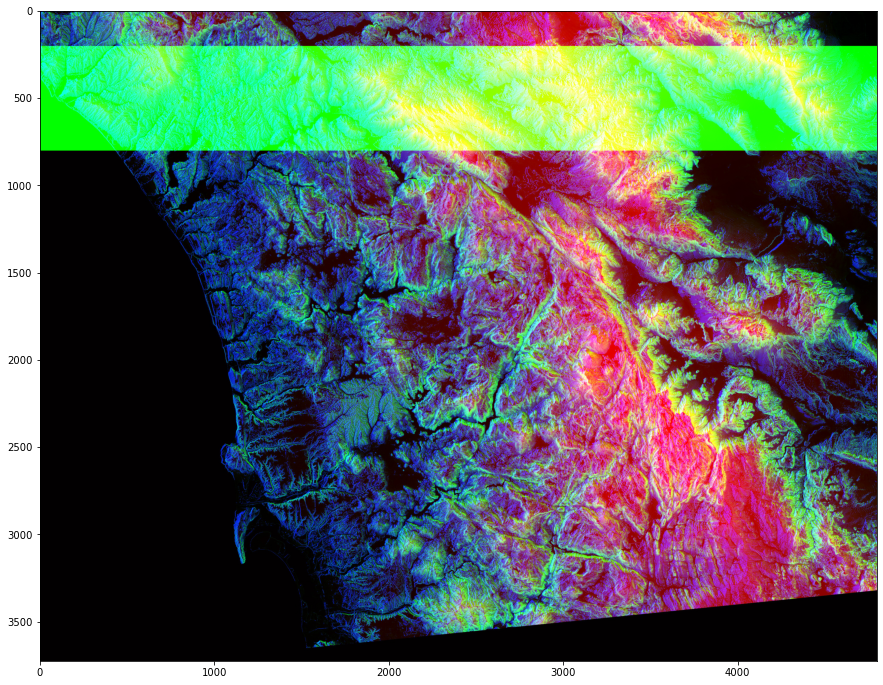

In [42]:
# set all the 3 layers of the particular value to 0
photo_data[200:800, :, 1]=255

plt.figure(figsize=(15, 15))
plt.imshow(photo_data)
plt.show()

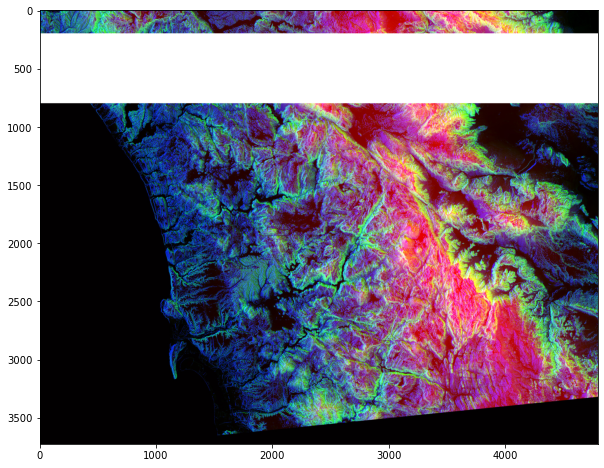

In [43]:
# Now we will set the value of red, green and blue layer to full intensity (we will get a white block)
# for rows 200 to 800 for all the columns
photo_data=imageio.imread("data/sd-3layers.jpg")
photo_data[200:800, :]=255

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

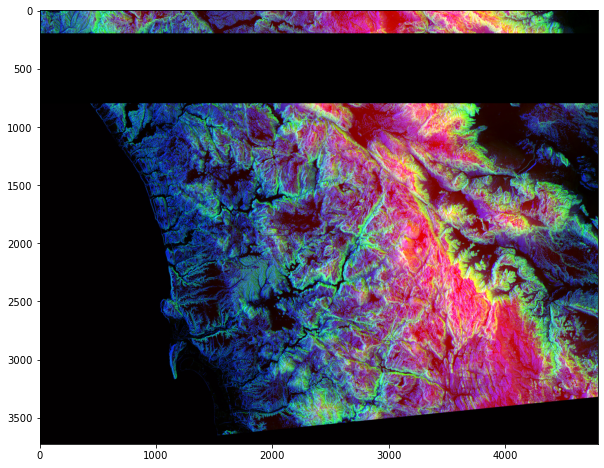

In [44]:
# Now we will set the value of red, green and blue layer to least intensity (we will get a black block)
# for rows 200 to 800 for all the columns
photo_data=imageio.imread("data/sd-3layers.jpg")
photo_data[200:800, :]=0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

shape of photo data  (3725, 4797, 3)
shape of low value filter  (3725, 4797, 3)


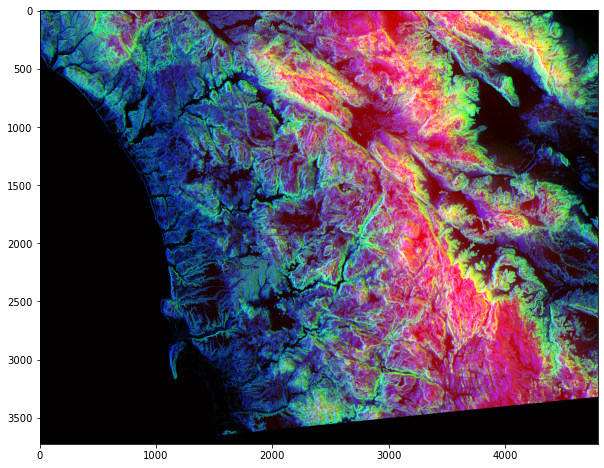

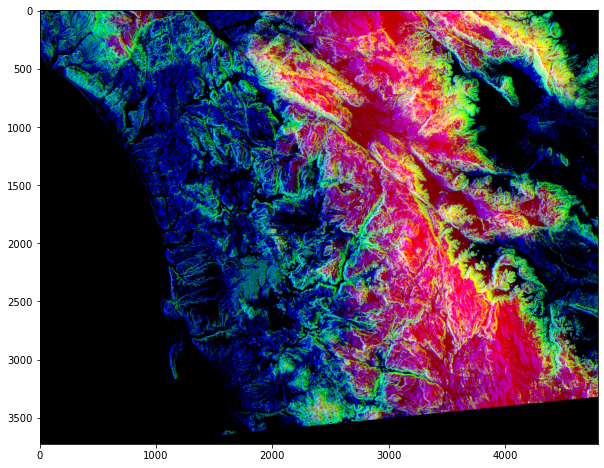

In [45]:
# pick all pixels with low value
photo_data=imageio.imread("data/sd-3layers.jpg")
print("shape of photo data ", photo_data.shape)
low_value_filter=photo_data<100 #Create a boolean array with the same shape as of photo_data
print("shape of low value filter ", low_value_filter.shape)


# filtering out the low values
# whenever the low_value_filter is true, set value to 0
plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

photo_data[low_value_filter]=0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

In [46]:
# more rows and column operations
# We can design complex patterns by making columns a function of rows and vice versa
# Here we try a linear relationship between rows and columns
print("photo_data.shape: ", photo_data.shape)
rows_range=np.arange(len(photo_data))
print("rows_range ", rows_range)

cols_range=rows_range
print("cols_range= ", cols_range)

print(type(rows_range))

photo_data.shape:  (3725, 4797, 3)
rows_range  [   0    1    2 ... 3722 3723 3724]
cols_range=  [   0    1    2 ... 3722 3723 3724]
<class 'numpy.ndarray'>


photo_data=  [[[255 255 255]
  [  0   0   0]
  [  0   0 128]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0 109]
  [255 255 255]
  [  0   0 157]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0 155]
  [  0   0 174]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


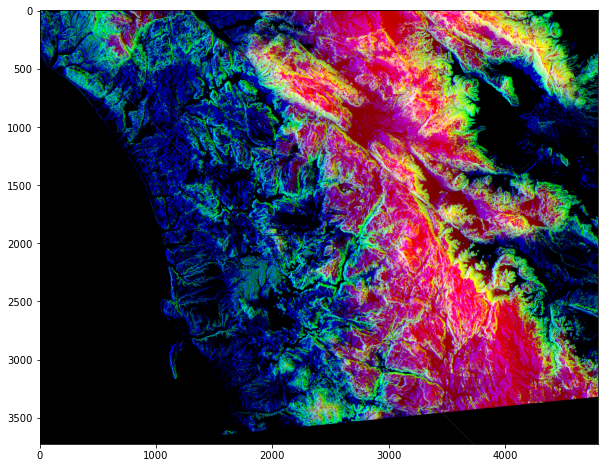

In [47]:
# We are setting the selected rows and columns to the maximum value of 255
photo_data[rows_range, cols_range]=255
print("photo_data= ", photo_data)


plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

In [52]:
photo_data=imageio.imread("data/sd-3layers.jpg")


# Masking Images
# lets mask the image with circular disc

total_rows, total_cols, total_layers=photo_data.shape
print("photo_data.shape ", photo_data.shape)

X, Y= np.ogrid[:total_rows, :total_cols]
print("X= ", X.shape, " and Y = ", Y.shape)

photo_data.shape  (3725, 4797, 3)
X=  (3725, 1)  and Y =  (1, 4797)


In [55]:
# from IPython.display import Image
# Image("Images/figure.png")

center_row, center_col=total_rows/2, total_cols/2
print("center_row= ", center_row, " and center_col= ", center_col)


center_row=  1862.5  and center_col=  2398.5


In [57]:
dist_from_center=(X-center_row)**2+(Y-center_col)**2

radius=(total_rows/2)**2

circular_mask=(dist_from_center>radius)

print("circular_mask, ", circular_mask[1500:1700, 2000:2200])

circular_mask,  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


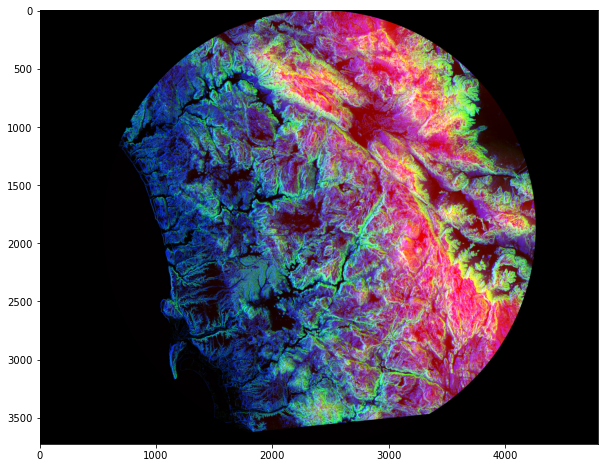

In [58]:
photo_data[circular_mask]=0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

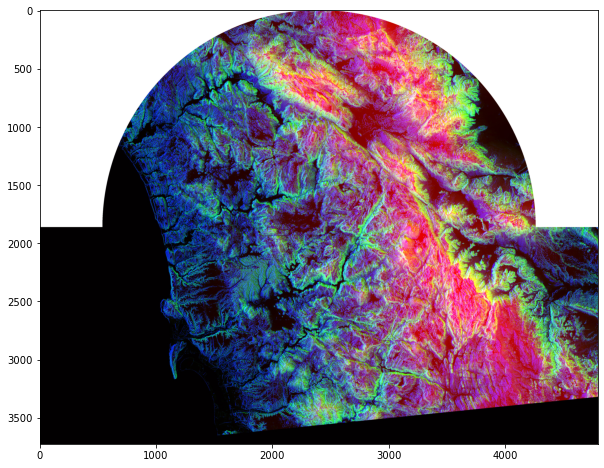

In [64]:
# we can further improve the mask, for example just get the upper half of the disc
X, Y=np.ogrid[:total_rows, :total_cols]

half_upper=X<center_row #This line generates the mask for all rows above the center

half_upper_mask=np.logical_and(half_upper, circular_mask)

photo_data=imageio.imread("data/sd-3layers.jpg")


photo_data[half_upper_mask]=255

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

# Further processing of our satellite imagery
* Processing of RED Pixels
* Remember that red pixel tells us about the height. let us try to highlight all the high altitude areas. we will do this by detecting high intensity RED pixels and muting down other areas.

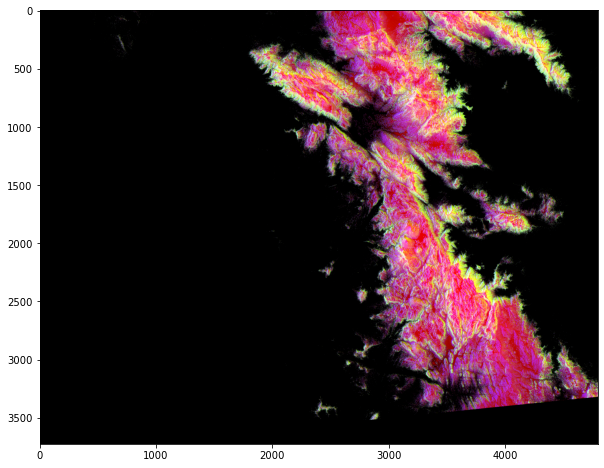

In [65]:
photo_data=imageio.imread("data/sd-3layers.jpg")
red_mask=photo_data[:, :, 0]<150
photo_data[red_mask]=0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

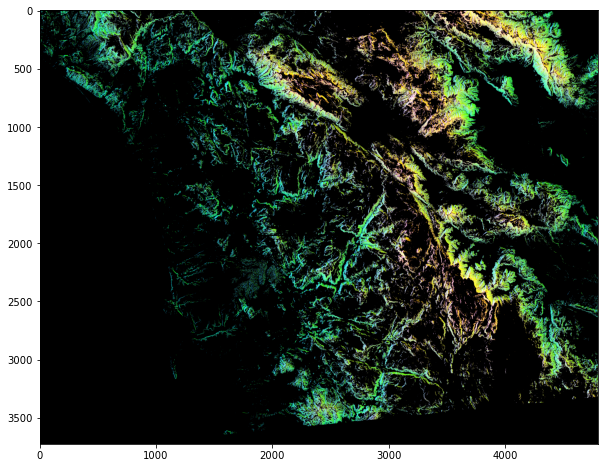

In [66]:
# Detecting high-green pixels

photo_data=imageio.imread("data/sd-3layers.jpg")
green_mask=photo_data[:, :, 1]<150
photo_data[green_mask]=0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

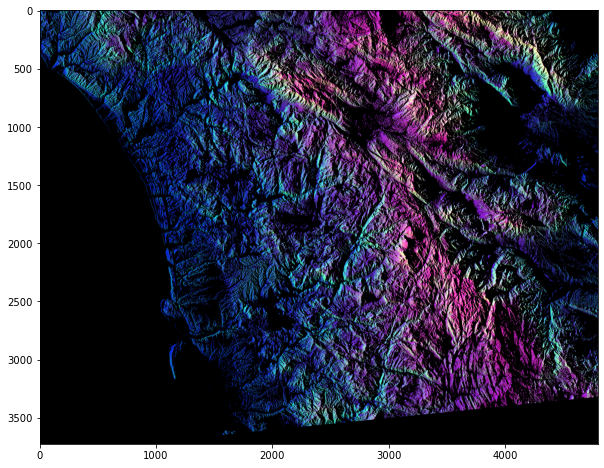

In [67]:
# Detecting high-green pixels

photo_data=imageio.imread("data/sd-3layers.jpg")
blue_mask=photo_data[:, :, 2]<150
photo_data[blue_mask]=0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()

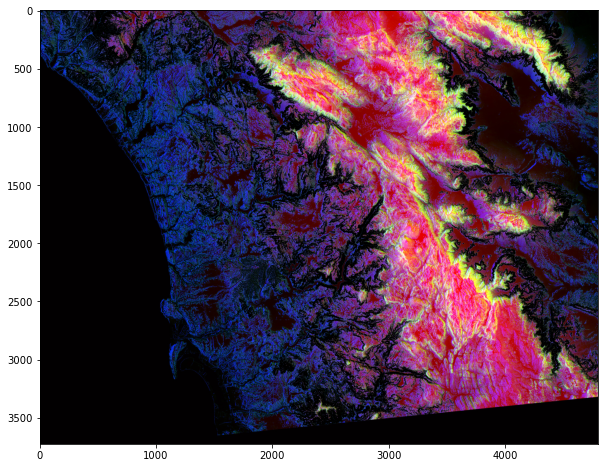

In [68]:
# Composite mask that takes all the three layers:Red, Green and Blue
photo_data=imageio.imread("data/sd-3layers.jpg")
red_mask=photo_data[:, :, 0]<150
green_mask=photo_data[:, :, 1]>100
blue_mask=photo_data[:, :, 2]<100

final_mask=np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask]=0


plt.figure(figsize=(10, 10))
plt.imshow(photo_data)
plt.show()